# Mexico ZipCode - Container Polygon

In [1]:
from pyspark.sql.functions import expr
from rpolygonpoint.containerpolygon import ContainerPolygon
from rpolygonpoint.utils.spark import spark
from rpolygonpoint.utils.plot import plot_polygon, add_polygon, add_point
from rpolygonpoint.utils.plot import polygon_to_list, point_to_list

In [2]:
# Path to data and workspace
path_ws = "C:/D/engines/rpolygonpoint/rpolygonpoint/data/"

In [3]:
# Load data to Mexico polygon
df_mexico_polygon = spark.read.parquet(path_ws + "t_country_polygon")\
    .filter("country_id = 'MX'")\
    .selectExpr(
        "polygon_id",
        "point_seq",
        "longitude_id as coord_x",
        "latitude_id as coord_y"
    ).filter("point_seq != 3382")

df_mexico_polygon.show(5)

+----------+---------+-----------+----------------+
|polygon_id|point_seq|    coord_x|         coord_y|
+----------+---------+-----------+----------------+
|         1|      1.0|-114.742783|       18.322777|
|         1|      2.0|-114.789726|18.3180540000001|
|         1|      3.0|-114.796402|18.3188860000001|
|         1|      4.0|-114.800568|18.3216629999999|
|         1|      5.0|-114.802513|18.3266640000001|
+----------+---------+-----------+----------------+
only showing top 5 rows



In [4]:
# Load data to Mexico Zipcode
df_mexico_zipcode2 = spark.read.parquet(path_ws + "t_world_zipcode")\
    .filter("country_id = 'MX'")\
    .drop("country_name", "country_id")

df_mexico_zipcode2.show(5)

# There is more than one coordinate per zipcode
df_mexico_zipcode = df_mexico_zipcode2\
    .groupBy(
        "zipcode_id"
    ).agg(
        expr("mean(longitude_id) as coord_x"),
        expr("mean(latitude_id) as coord_y")
    ).distinct()

df_mexico_zipcode.show(5)

+--------+--------------+-------+--------------+--------------------+----------+------------+-----------+
|state_id|    state_name|city_id|     city_name|           town_name|zipcode_id|longitude_id|latitude_id|
+--------+--------------+-------+--------------+--------------------+----------+------------+-----------+
|      01|AGUASCALIENTES|    001|AGUASCALIENTES|         AGRICULTURA|     20234|   -102.1885|    21.8767|
|      01|AGUASCALIENTES|    001|AGUASCALIENTES|        AGROPECUARIO|     20135|   -102.2957|    21.8115|
|      01|AGUASCALIENTES|    001|AGUASCALIENTES|          AGUA CLARA|     20263|   -102.2848|    21.8669|
|      01|AGUASCALIENTES|    001|AGUASCALIENTES|AGUASCALIENTES (L...|     20349|   -102.3288|    21.7578|
|      01|AGUASCALIENTES|    001|AGUASCALIENTES| AGUASCALIENTES 2000|     20117|   -102.3247|    21.8484|
+--------+--------------+-------+--------------+--------------------+----------+------------+-----------+
only showing top 5 rows

+----------+---------

In [5]:
# Generated Mexico polygon mesh

mexico_polygon_container = ContainerPolygon(df_mexico_polygon)

mexico_polygon_container.set_path_data(path_ws + "mx_zipcode_polygoncontainer/")
mexico_polygon_container.set_mesh_bsize(2)


mexico_polygon_container.get_polygon_mesh()
# mexico_polygon_container.load_polygon_mesh() # Load preprocesor to polygon container

[2021-12-13 00:46:28.557282] - [INFO] - [write_persist] :: Write DataFrame to C:/D/engines/rpolygonpoint/rpolygonpoint/data/mx_zipcode_polygoncontainer/t_rpp_delimiter_rectangle: WriteMode overwrite!
[2021-12-13 00:46:40.205115] - [INFO] - [write_persist] :: Persist DataFrame EndPolygonPoint with 4,168 rows: StorageLevel Disk Serialized 1x Replicated!
[2021-12-13 00:46:48.619601] - [INFO] - [write_persist] :: Write DataFrame to C:/D/engines/rpolygonpoint/rpolygonpoint/data/mx_zipcode_polygoncontainer/t_rpp_polygon_side: WriteMode overwrite!
[2021-12-13 00:46:48.643536] - [INFO] - [unpersist] :: Unpersist DataFrame EndPolygonPoint!
[2021-12-13 00:46:51.236598] - [INFO] - [write_persist] :: Persist DataFrame PolygonMesh with 2,608 rows: StorageLevel Disk Serialized 1x Replicated!
[2021-12-13 00:46:58.130152] - [INFO] - [write_persist] :: Persist DataFrame ContainerPolygon with 720 rows: StorageLevel Disk Serialized 1x Replicated!
[2021-12-13 00:47:13.000364] - [INFO] - [write_persist] ::

In [7]:
# Validate location of zipcode
df_mexico_zipcode_val = mexico_polygon_container\
    .get_container_polygon(
        df_point=df_mexico_zipcode, 
        point_id="zipcode_id"
    )

[2021-12-13 00:49:56.742886] - [INFO] - [write_persist] :: Persist DataFrame ContainerRectangle with 32,493 rows: StorageLevel Disk Serialized 1x Replicated!
[2021-12-13 00:50:00.461934] - [INFO] - [write_persist] :: Persist DataFrame PolygonDelimietRectangle with 617 rows: StorageLevel Disk Serialized 1x Replicated!
[2021-12-13 00:50:04.663691] - [INFO] - [write_persist] :: Persist DataFrame ContainerRectangle with 32,507 rows: StorageLevel Disk Serialized 1x Replicated!
[2021-12-13 00:50:22.242654] - [INFO] - [write_persist] :: Persist DataFrame ContainerPolygon with 5,251 rows: StorageLevel Disk Serialized 1x Replicated!
[2021-12-13 00:50:27.525518] - [INFO] - [write_persist] :: Persist DataFrame ContainerPolygon with 37,758 rows: StorageLevel Disk Serialized 1x Replicated!
[2021-12-13 00:50:27.529508] - [INFO] - [unpersist] :: Unpersist DataFrame ContainerRectangle!
[2021-12-13 00:50:27.533497] - [INFO] - [unpersist] :: Unpersist DataFrame DelimiterRectangle-MeshCell!
[2021-12-13 0

In [8]:
lst_mexico_polygon = polygon_to_list(df_mexico_polygon)
lst_mexixo_zipcode = point_to_list(df_mexico_zipcode)
lst_mexixo_zipcode_val = point_to_list(df_mexico_zipcode_val)

(<AxesSubplot:title={'center':'Validation Mexico ZipCode'}, xlabel='coord x', ylabel='coord y'>,
 <Figure size 7200x7200 with 1 Axes>)

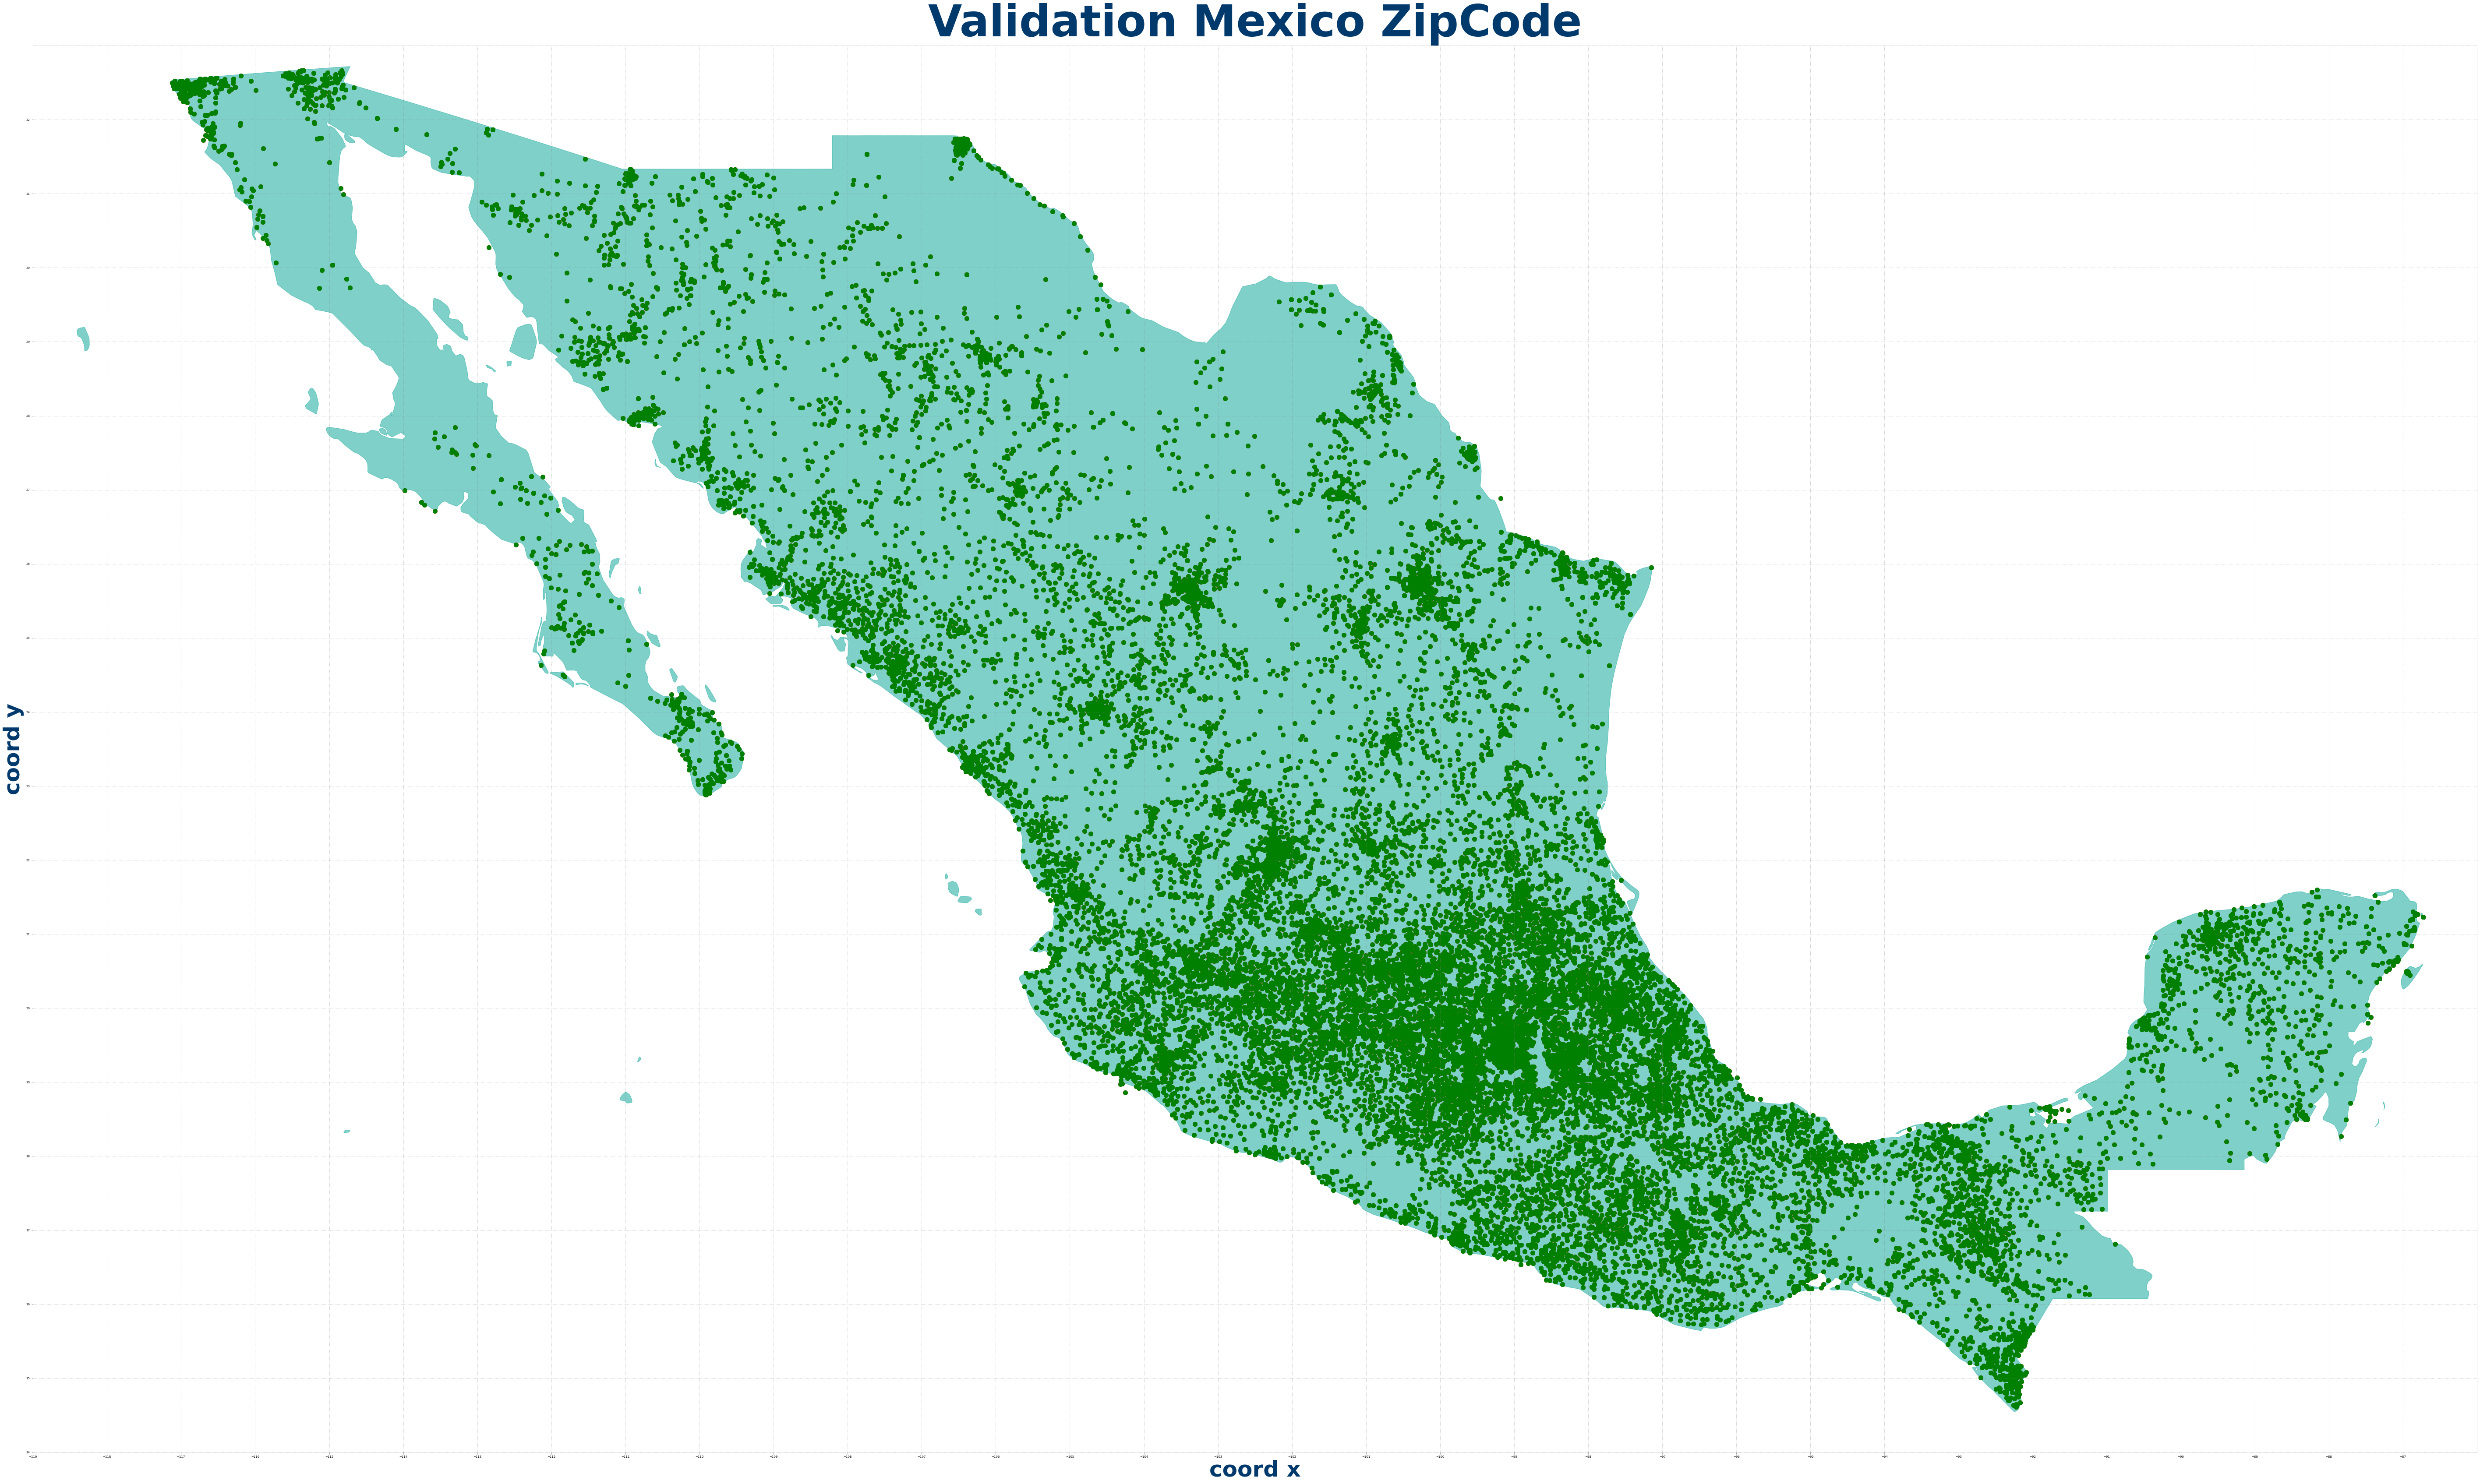

In [9]:
# Generated plot of validation of Mexico zipcode
# Green color is ok
# Red color is not ok

fig = plot_polygon(lst_mexico_polygon, tick=1, title="Validation Mexico ZipCode",  figsize=(100, 100), alpha=.5, fontsize=5)
add_point(fig, lst_mexixo_zipcode, color="red", size=5)
add_point(fig, lst_mexixo_zipcode_val, color="green", size=5)

In [10]:
spark.catalog.clearCache()